In [13]:
from imutils import paths
from PIL import Image
import numpy as np
from tqdm import tqdm
import pandas as pd
import os

In [14]:
imagesPaths = pd.read_csv('imagesPaths.csv')['imagesPaths'].values

In [15]:
imagesPaths

array(['train/ID_0109d55c2/brain.jpg', 'train/ID_0109d55c2/bone.jpg',
       'train/ID_0109d55c2/subdural.jpg', ...,
       'train/ID_8c90c5de0/brain.jpg', 'train/ID_8c90c5de0/bone.jpg',
       'train/ID_8c90c5de0/subdural.jpg'], dtype=object)

In [16]:
# imagesPaths =  dataframe['imagePath'].values[:100000]

In [17]:
type(imagesPaths[0])

str

In [18]:
imagesPaths[0].index('/')

5

In [19]:
train_folder = 'final_train'

if not os.path.exists(train_folder):
    os.mkdir(train_folder)

In [20]:
len(imagesPaths)

300000

In [21]:
finalImage = np.zeros((224, 224, 3), dtype=int)
trainImages = []
imageWindows = []


for i in range(len(imagesPaths)):
 
    image = Image.open(imagesPaths[i])
    npImage = np.asarray(image)
#     print(imagesPaths[i])
    # npImage = npImage / 255
  
    imageWindows.append(npImage[:,:,0])
#     print(len(imageWindows))
    if((i + 1) % 3 == 0):
#         print('entrou')
        index1 = imagesPaths[i].index('/') + 1
        index2 = imagesPaths[i][index1:].index('/')
        nameImage = imagesPaths[i][index1: index1 + index2]

        finalImage[:,:,0] = imageWindows[0]
        finalImage[:,:,1] = imageWindows[1]
        finalImage[:,:,2] = imageWindows[2]

        img = Image.fromarray(np.uint8(finalImage))
        img.save(train_folder + '/' + nameImage + '.jpg')
        # trainImages.append(imageWindows)
        imageWindows =  []

In [22]:
finalImage.shape

(224, 224, 3)

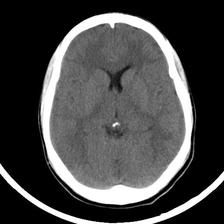

In [23]:
Image.fromarray(np.uint8(finalImage[:,:,0]))

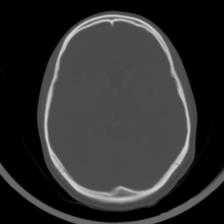

In [24]:
Image.fromarray(np.uint8(finalImage[:,:,1]))

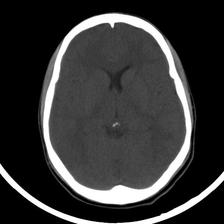

In [25]:
Image.fromarray(np.uint8(finalImage[:,:,2]))